# Monte Carlo Simulation for FE
## IEOR 4703

### Pareto example using  a Gibbs sampler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Population of cities in New York State

In [2]:
cities = pd.read_csv('ParetoExampleData.csv') # load the csv file
print(cities)

data = np.array(cities['Population'])
print(data)

data = data[:100]
print(data)

n = len(data)

     Rank                                  City  Population
0       1               New York city, New York     8537673
1       2                Buffalo city, New York      256902
2       3              Rochester city, New York      208880
3       4                Yonkers city, New York      200807
4       5               Syracuse city, New York      143378
..    ...                                   ...         ...
603   604            Herrings village, New York          86
604   605         Ocean Beach village, New York          82
605   606  West Hampton Dunes village, New York          58
606   607            Saltaire village, New York          41
607   608       Dering Harbor village, New York          11

[608 rows x 3 columns]
[8537673  256902  208880  200807  143378   98111   79557   68344   64913
   60652   58241   55555   49702   48632   45672   43279   37673   33717
   32603   32415   30756   30607   30267   29775   29524   28340   28200
   27962   27763   27653   27341   27

In [3]:
a = 0.1
# cutoff point
g = 20

nIters = 10000

lenWindow = 400

aArray  = np.zeros(nIters)
gArray = np.zeros(nIters)

xMin = np.min(data)

# Burn-in period
b = 50

for i in range(b + nIters):
    a = np.random.gamma(n + 1, 1./(np.sum(np.log(data)) - n*np.log(g)))
    u = np.random.rand()
    g = xMin*u**(1./(n*a + 1))
    if i >= b:
        aArray[i-b] = a
        gArray[i-b] = g

### Traceplots and estimated densities

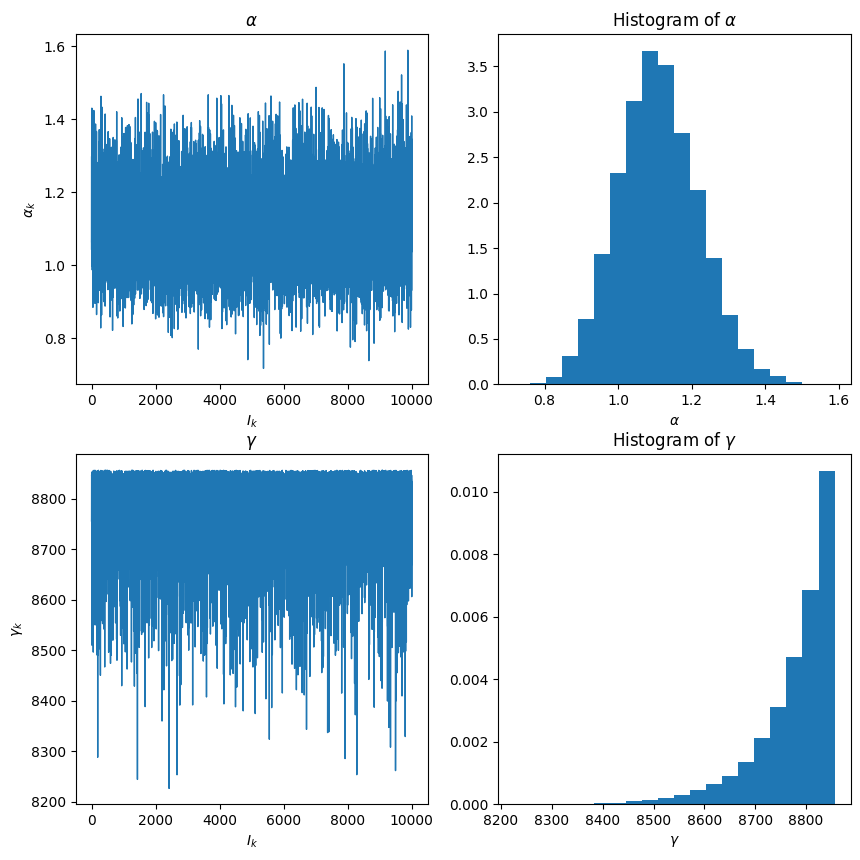

In [4]:
plt.figure(figsize=(10,10))

# traceplots
plt.subplot(2, 2, 1)
plt.plot(aArray, linewidth=1)
plt.xlabel('$I_k$')
plt.ylabel(r'$\alpha_k$')
plt.title(r'$\alpha$')

plt.subplot(2, 2, 3)
plt.plot(gArray, linewidth=1)
plt.xlabel('$I_k$')
plt.ylabel(r'$\gamma_k$')
plt.title(r'$\gamma$')

# estimated density
plt.subplot(2, 2, 2)
plt.hist(aArray, bins=20, density=True)
plt.xlabel(r'$\alpha$')
plt.title(r'Histogram of $\alpha$')

plt.subplot(2, 2, 4)
plt.hist(gArray, bins=20, density=True)
plt.xlabel(r'$\gamma$')
plt.title(r'Histogram of $\gamma$')

plt.show()


### Running average

In [6]:
aRunningAvg = np.zeros(nIters)
gRunningAvg = np.zeros(nIters)

aAvgFixedWindow = np.zeros(nIters)
gAvgFixedWindow = np.zeros(nIters)

aRunningAvg[0] = aArray[0]
gRunningAvg[0] = gArray[0]

aAvgFixedWindow[0] = aArray[0]
gAvgFixedWindow[0] = gArray[0]
# recusive calculation of averages
for k in range(1, nIters):
    aRunningAvg[k] = (aRunningAvg[k-1]*k + aArray[k])/(k + 1)
    gRunningAvg[k] = (gRunningAvg[k-1]*k + gArray[k])/(k + 1)
    #
    if k>lenWindow:
        aAvgFixedWindow[k] = np.mean(aArray[k-lenWindow:k])
        gAvgFixedWindow[k] = np.mean(gArray[k-lenWindow:k])
    else:
        aAvgFixedWindow[k] = np.mean(aArray[0:k])
        gAvgFixedWindow[k] = np.mean(gArray[0:k])

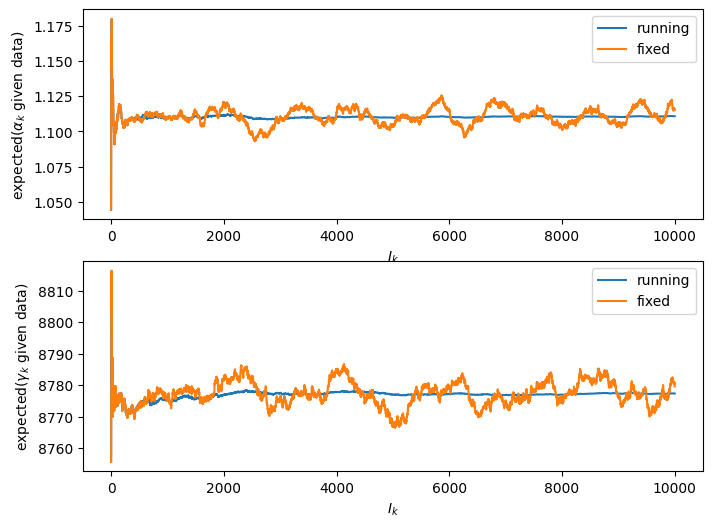

In [7]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(aRunningAvg, label='running')
plt.plot(aAvgFixedWindow, label='fixed')
plt.xlabel(r'$I_k$')
plt.ylabel(r'expected($\alpha_k$ given data)')
plt.legend(loc='best')

plt.subplot(2,1,2);
plt.plot(gRunningAvg, label='running')
plt.plot(gAvgFixedWindow, label='fixed')
plt.xlabel(r'$I_k$')
plt.ylabel(r'expected($\gamma_k$ given data)')
plt.legend(loc='best')

plt.show()

### Survival functions

In [8]:
x = np.arange(np.min(data) + 1000, np.max(data) - 1000, 1000)
len1 = len(x)

s = np.zeros(len1)
f = np.zeros(len1)
for j in range(len1):
    s[j] = np.sum((gArray/x[j])**aArray)/nIters
    f[j] = 1. - np.sum(x[j] >= data)/n

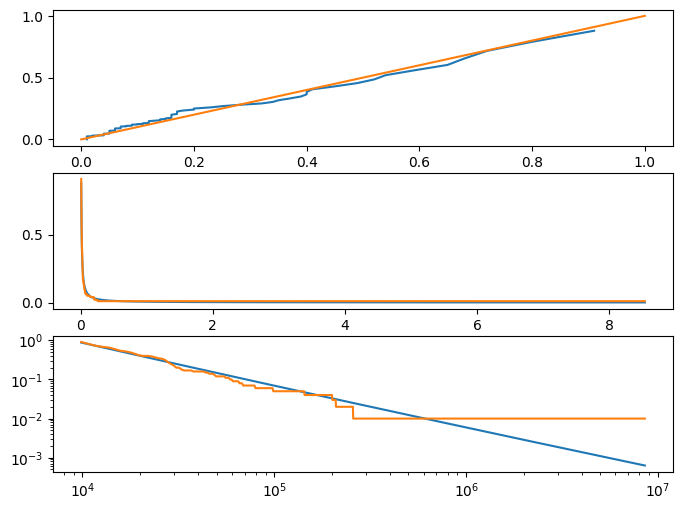

In [9]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.plot(f, s)
plt.plot([0, 1], [0, 1])

plt.subplot(3, 1, 2)
plt.plot(x, s)
plt.plot(x, f)

plt.subplot(3, 1, 3)
plt.loglog(x, s)
plt.loglog(x, f)

plt.show()